In [52]:
# Generate top topics for documents using NMF
# Outputs a dataframe for each app with top 3 topics they are related to, and the topics' probabilities

# Partly inspired by NMF topic modelling tutorial
# at https://www.kaggle.com/code/rockystats/topic-modelling-using-nmf

import pandas as pd

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# set number of topics
num_topics=8

# Final comparison done with 46 topics
num_topics = 46

# read in the document data
df = pd.read_csv('../../data/enriched_data.csv')

documents = df['PreprocessedDescription']


In [53]:
vectorizer = TfidfVectorizer(
    min_df=3,        #don't add terms that appear less than 3 of the descriptions to the vocabulary
    max_features=2000, # limit to 2000 most frequent terms
    ngram_range=(1, 1)
)


tfidf_vocabulary = vectorizer.fit_transform(documents)
tfidf_word_id_map = vectorizer.get_feature_names_out()


In [54]:
# Do the non-negative matrix factorization

# TODO: use Octis optimizer here to compare the results more thoroughly
nmf = NMF(
    random_state=1,
    n_components=num_topics, # number of topics to generate
    init='nndsvd'
    solver='cd',
    #init='nndsvda',
    #solver='mu' # multiplicative update
).fit(tfidf_vocabulary)


In [55]:
# Getting a df with each topic by document
H_doc_by_topic = nmf.transform(vectorizer.transform(documents))

n_topic_words = 5

topics = {}
for topic_idx, topic in enumerate(nmf.components_):
    t = (topic_idx)
    topics[t] = ' '.join([tfidf_word_id_map[i] for i in topic.argsort()[:(-n_topic_words - 1): -1]])


In [56]:
# get top 3 scoring topics and create a data frame that contains the topics and the original document text
docweights = H_doc_by_topic

topic_strings = []
topic_probabilities = []
n_top_topics = 3

for weight in docweights:
    top_topic_idx = weight.argsort()[::-1][:n_top_topics]
    topic_strings.append([topics[i] for i in top_topic_idx])
    topic_probabilities.append([weight[i] for i in top_topic_idx])

topic_df = pd.concat([df['App_Name'], documents, pd.DataFrame(topic_strings), pd.DataFrame(topic_probabilities)], axis=1)
topic_df.columns = ['AppName', 'TrimmedDescription', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_1_p', 'Topic_2_p', 'Topic_3_p']



In [83]:
topic_df


,AppName,TrimmedDescription,Topic_1,Topic_2,Topic_3,Topic_1_p,Topic_2_p,Topic_3_p
0,AAA³ Little Ponies & Unicorns,welcome land fairies puzzle game toddlers kids...,kids learning fun educational games,puzzles puzzle jigsaw pieces solve,game center simple best playing,0.073958,0.037707,0.016773
1,GA1: An Assassin in Orlandes,interactive fantasy adventure book game rpg ga...,adventure story island characters mysterious,dice roll rolls board rolling,iphone ipad touch ipod universal,0.060971,0.046775,0.015306
2,Baby Games App (by HAPPYTOUCH®),plenty press touch explore children ages happy...,children child learning parents learn,numbers number math brain color,animals animal farm zoo sounds,0.088422,0.036710,0.030975
3,Hadean Lands,winner xyzzy interactive fiction awards best p...,adventure story island characters mysterious,puzzles puzzle jigsaw pieces solve,game center simple best playing,0.048257,0.026828,0.018199
4,Pango and friends,discover unpublished pango stories interactive...,english spanish french german languages,adventure story island characters mysterious,children child learning parents learn,0.049350,0.034047,0.029619
...,...,...,...,...,...,...,...,...
12896,Touchdown Hero: New Season,new season finally field outmanoeuvre defender...,score points high scores bonus,new games unlock create best,play player players online multiplayer,0.043819,0.025155,0.013337
12897,Hidden Objects USA Time Object,vacation usa explore beautiful travel spots me...,hidden object objects cradle city,levels level difficulty challenging complete,word words letters letter search,0.052799,0.043274,0.040529
12898,Slots! Golden Cherry,number casino slot machine real play free fore...,slots casino slot vegas win,fun great graphics music addictive,play player players online multiplayer,0.125165,0.017198,0.014214
12899,XAirports,xairports utility app allows owner popular fli...,app free real money purchases,numbers number math brain color,hidden object objects cradle city,0.026693,0.010720,0.008392


In [58]:
# Explore the results

# get the most high scores for each unique topic
topic_df.groupby('Topic_1').max().sort_values(by='Topic_1_p', ascending=False)


,AppName,TrimmedDescription,Topic_2,Topic_3,Topic_1_p,Topic_2_p,Topic_3_p
Topic_1,,,,,,,
poker texas chips hold video,Zynga Poker - Texas Holdem,＊＊＊ play way success ＊＊＊ video poker player wo...,world compete real best countries,world compete real best countries,0.286672,0.106967,0.060500
truck garbage trucks monster vehicles,Wrecking Ball Truck,young children fascinated things colorful puzz...,zombies zombie weapons undead survive,world compete real best countries,0.261841,0.086610,0.066118
und die der med des,Wissenstraining. Das Quiz.,„wer war ist genau die richtige wahl für logik...,tiles mahjong tile board remove,zombies zombie weapons undead survive,0.260091,0.119044,0.046957
tac tic toe player row,XOX: Tic Tac Toe,xox tic tac toe naughts crosses game high scor...,world compete real best countries,world compete real best countries,0.256067,0.083765,0.043135
dice roll rolls board rolling,YourGameDice,“there’s wonderfully freeing restricting ages ...,world compete real best countries,world compete real best countries,0.255778,0.122946,0.054610
chess moves board pieces games,World Chess Championship,“shogi” classic board game popularly played pa...,world compete real best countries,world compete real best countries,0.237670,0.114309,0.071622
zombies zombie weapons undead survive,Zompy Jumpy - Zombie Jump,★★★★★ tired building best farm try destroying ...,world compete real best countries,world compete real best countries,0.237260,0.113296,0.046638
sudoku notes grid column row,Zendoku,‘sudoku sudoku game combines classic sudoku ga...,world compete real best countries,world compete real best countries,0.234414,0.110753,0.059992
christmas santa presents holiday time,Xmas Jigsaws Puzzle Game: Farm,•pop groups christmas bubbles icon •collect sc...,zombies zombie weapons undead survive,zombies zombie weapons undead survive,0.233481,0.109844,0.061681


In [59]:
# Most dominant topic across the documents based on the probability
topic_df.groupby('Topic_1').sum('Topic_1_p').sort_values(by='Topic_1_p', ascending=False)


,Topic_1_p,Topic_2_p,Topic_3_p
Topic_1,,,
solitaire cards card klondike spider,47.530746,14.768732,9.475138
word words letters letter search,45.157703,17.763616,10.921385
battle enemies enemy war weapons,44.445490,22.621337,15.293523
puzzles puzzle jigsaw pieces solve,32.861021,17.209572,10.775551
car racing cars race tracks,31.572936,11.997038,7.416604
subscription period account renewal gameclub,31.146492,9.087389,4.954828
ball balls bowling physics soccer,29.959253,12.857226,7.971746
children child learning parents learn,26.575229,13.639540,8.642770
jump run coins obstacles collect,25.578581,12.591284,8.421696


In [60]:
# Most frequent topics across the documents based on counts, i.e. which topic appears the most
# regardless of the probability sum
topic_df.groupby('Topic_1').count().sort_values(by='Topic_1_p', ascending=False)


,AppName,TrimmedDescription,Topic_2,Topic_3,Topic_1_p,Topic_2_p,Topic_3_p
Topic_1,,,,,,,
battle enemies enemy war weapons,890,890,890,890,890,890,890
solitaire cards card klondike spider,520,520,520,520,520,520,520
puzzles puzzle jigsaw pieces solve,481,481,481,481,481,481,481
play player players online multiplayer,476,476,476,476,476,476,476
word words letters letter search,468,468,468,468,468,468,468
baby dress pet little hair,446,446,446,446,446,446,446
jump run coins obstacles collect,445,445,445,445,445,445,445
adventure story island characters mysterious,422,422,422,422,422,422,422
iphone ipad touch ipod universal,422,422,422,422,422,422,422


In [67]:

import topicwizard
from topicwizard.pipeline import make_topic_pipeline

from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
#nmf = NMF(n_components=num_topics)
pipeline = make_topic_pipeline(bow_vectorizer, nmf)
pipeline.fit(documents)

# commented for not accidentally running this as it's slow
app = topicwizard.visualize(corpus=documents, pipeline=pipeline)



Preprocessing


/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:92: RuntimeWarning:

divide by zero encountered in log

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:94: RuntimeWarning:

invalid value encountered in divide

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:94: RuntimeWarning:

divide by zero encountered in log

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:92: RuntimeWarning:

divide by zero encountered in log

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:94: RuntimeWarning:

invalid value encountered in divide

/Users/tsido/opt/anaconda3/envs/datasci-intro/lib/python3.10/site-packages/topicwizard/prepare/topics.py:94: RuntimeWarning:

divide by zero encountered in log

/Users/tsido/opt/anaconda3/env

In [66]:
topics


{0: 'game center simple best playing',
 1: 'word words letters letter search',
 2: 'solitaire cards card klondike spider',
 3: 'kids learning fun educational games',
 4: 'subscription period account renewal gameclub',
 5: 'puzzles puzzle jigsaw pieces solve',
 6: 'fish big games discover enjoy',
 7: 'play player players online multiplayer',
 8: 'battle enemies enemy war weapons',
 9: 'car racing cars race tracks',
 10: 'iphone ipad touch ipod universal',
 11: 'english spanish french german languages',
 12: 'tiles mahjong tile board remove',
 13: 'slots casino slot vegas win',
 14: 'numbers number math brain color',
 15: 'chess moves board pieces games',
 16: 'guess friends facebook share challenge',
 17: 'escape room objects solve download',
 18: 'levels level difficulty challenging complete',
 19: 'ball balls bowling physics soccer',
 20: 'bubble bubbles pop shooter popping',
 21: 'sudoku notes grid column row',
 22: 'questions trivia quiz knowledge answer',
 23: 'truck garbage trucks

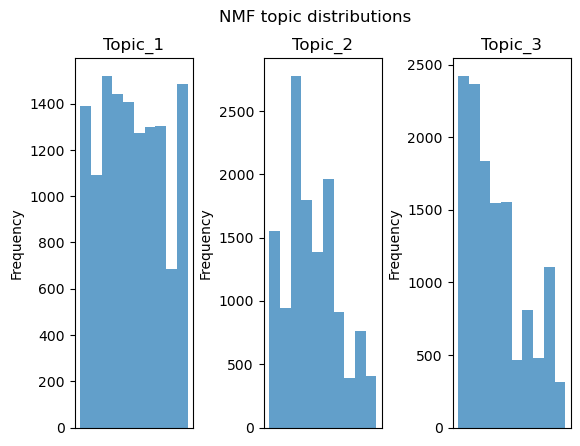

In [72]:
import matplotlib.pyplot as plt

columns = ['Topic_1', 'Topic_2','Topic_3']

fig, ax = plt.subplots(nrows=1, ncols=3)
for i, column in enumerate(columns):
    ax[i].hist(topic_df[column], alpha=0.7)
    ax[i].set_title(column)
    ax[i].set_ylabel('Frequency')
    ax[i].get_xaxis().set_visible(False)

plt.suptitle('NMF topic distributions')
plt.subplots_adjust(wspace=0.6)
plt.show()


In [82]:
#documents.contains('shinsengumi')
documents.str.contains('shinsengumi').sum()


2